# Boston House Price DataSet

***

Intro

***

In [181]:
# The packages we will be using are as follows:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (20, 10)

In [32]:
#we can also import the dataset as it is available in sklearn
from sklearn.datasets import load_boston          #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [33]:
#by opening the data array, the location is diplaed as filename': 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv' which we can instead pull directly into a pandas DF. 

In [34]:
df0 = pd.read_csv('C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv') #or boston['data'] could be used
df1 = pd.DataFrame(df0.values[1:], columns=df0.iloc[0]) # move the 'feature_names' title row to become the Pandas df title   #source: https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe
df = df1.astype(float)
#df.to_excel('Boston Data.xls', encoding = 'utf-8')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [215]:
#df.isnull().sum()    # will also check if there are any NaN's in each column, here there are not

In [216]:
#round(df.describe(), 3) #describe is a useful function to review the overall parameters of yoru dataset

By calling `boston['feature_names'])` we confirm the titles for each of the columns.

Furthermore, using `boston['DESCR']` gives us the description of each feature in each suburb. 

A summary is presented below:


1. **CRIM**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- per capita crime rate by town 
+ **ZN**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of residential land zoned for lots over 25,000 sq.ft.       
+ **INDUS**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of non-retail business acres per town
+ **CHAS**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)      
+ **NOX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- nitric oxides concentration (parts per 10 million)
+ **RM**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- average number of rooms per dwelling
+ **AGE**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of owner-occupied units built prior to 1940       
+ **DIS**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- weighted distances to five Boston employment centres        
+ **RAD**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- index of accessibility to radial highways 
+ **TAX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- full-value property-tax rate per \$10,000      
+ **PTRATIO**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- pupil-teacher ratio by town   
+ **B**        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town       
+ **LSTAT**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- % lower status of the population
+ **MEDV**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Median value of owner-occupied homes in $1000's  

Reviewing the data presented above, I can see that the key features we are interested in during this review are displayed. The MEDV (the mean value of the homes in the suburb) and CHAS (the data documenting which suburbs are by the Charles river) will be particularly relevant to us.


The CHAS is a binary data set meaning that there is only 2 possible entries, '1' if the suburb is by the river and '0'' if it is not. This immediately presents an opportunity for us to split the data into 2 groups to compare. 

In [217]:
df_chas = df1.iloc[:,3].str.contains('1', regex=False)
df_chas1 = pd.concat([df['MEDV'], df_chas], axis=1, sort=False)
df_chas1

chas_t = ((df_chas1[df_chas1['CHAS'] == True]).drop(['CHAS'], axis=1))
chas_f = (df_chas1[df_chas1['CHAS'] == False]).drop(['CHAS'], axis=1)

print('The number of in scope suburbs by the Charles River are', len(chas_t), 'from 506. This set is now called chas_t')

print('The maximum price from the sample of houses close to the river is $',chas_t['MEDV'].max(),'and minimum $', chas_t['MEDV'].min())
print('The mean price is $', chas_t['MEDV'].mean(), 'while the median is $', chas_t['MEDV'].median())
print('')
print('The number of in scope suburbs NOT by the Charles River are', len(chas_f),  'from 506. This set is now called chas_f')
print('The maximum price from the sample of houses away from the river is $',chas_f['MEDV'].max(),'and minimum $', chas_f['MEDV'].min())
print ('The mean price is $', round(chas_f['MEDV'].mean(),2), 'while the median is $', chas_f['MEDV'].median())

print ('NOTE: the MEDV has clearly been capped at $50k for the purpose of this dataset')

The number of in scope suburbs by the Charles River are 35 from 506. This set is now called chas_t
The maximum price from the sample of houses close to the river is $ 50.0 and minimum $ 13.4
The mean price is $ 28.44 while the median is $ 23.3

The number of in scope suburbs NOT by the Charles River are 471 from 506. This set is now called chas_f
The maximum price from the sample of houses away from the river is $ 50.0 and minimum $ 5.0
The mean price is $ 22.09 while the median is $ 20.9
NOTE: the MEDV has clearly been capped at $50k for the purpose of this dataset


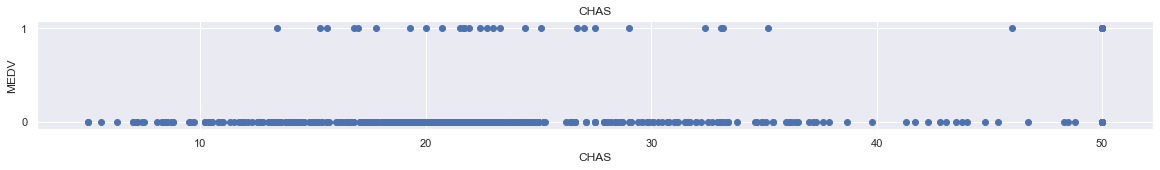

In [218]:
plt.figure(figsize=(20, 2))

features = ['CHAS'] #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = target
    y = df[col]
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.yticks(np.arange(0, 1.1, 1.0))
    plt.ylabel('MEDV')

Reviewing the spread of the average prices(MEDV) across the 2 data sets (beside the Charles River(1) or not(0)), confirms that the average price is not very much higher however the min price of 13.4 is geatly influencing the Charles River data set. 

In [219]:
ss.ttest_ind(chas_t, chas_f) #source: Machine Learning Lectures, Dr. Ian McLoughlan 2019

Ttest_indResult(statistic=array([3.99643747]), pvalue=array([7.39062317e-05]))

The ttest between the 2 groups asks the question, what is the probability that the 2 sample groups are from the same overall population? In this case the p value is extremely low and indicates that the the 2 groups are indeed different. 

In [220]:
#plt.hist(chas_t.values)

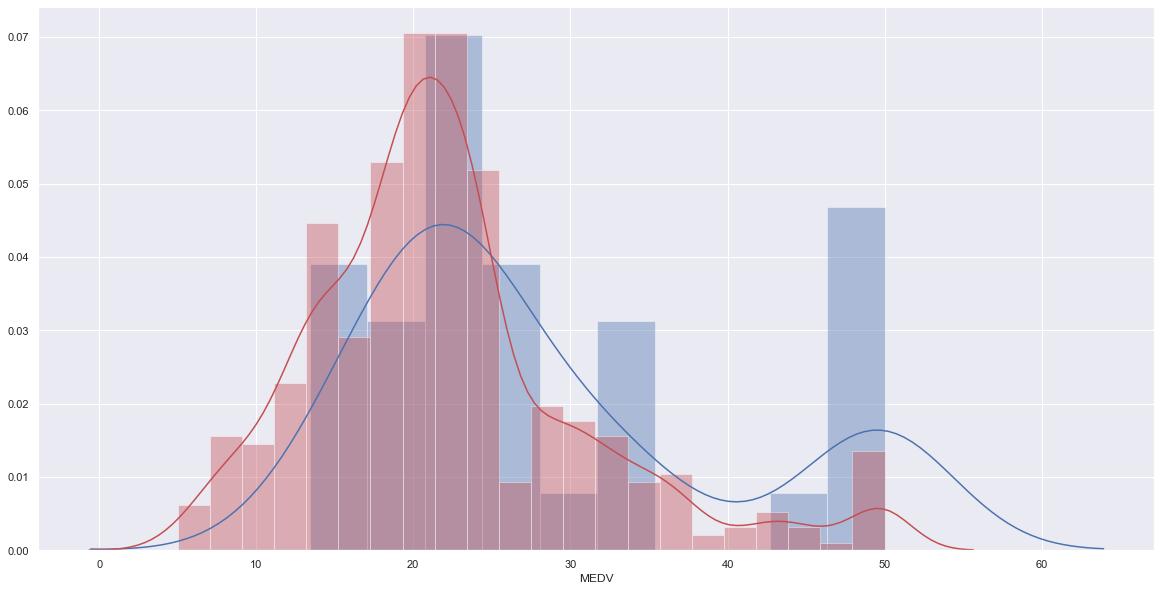

In [221]:
sns.distplot(chas_t, color='b', axlabel='MEDV', bins=10) # houses close to the river are in blue
sns.distplot(chas_f, color='r') # houses farther from the river are in red
#sns.distplot(df['MEDV'], color='k')

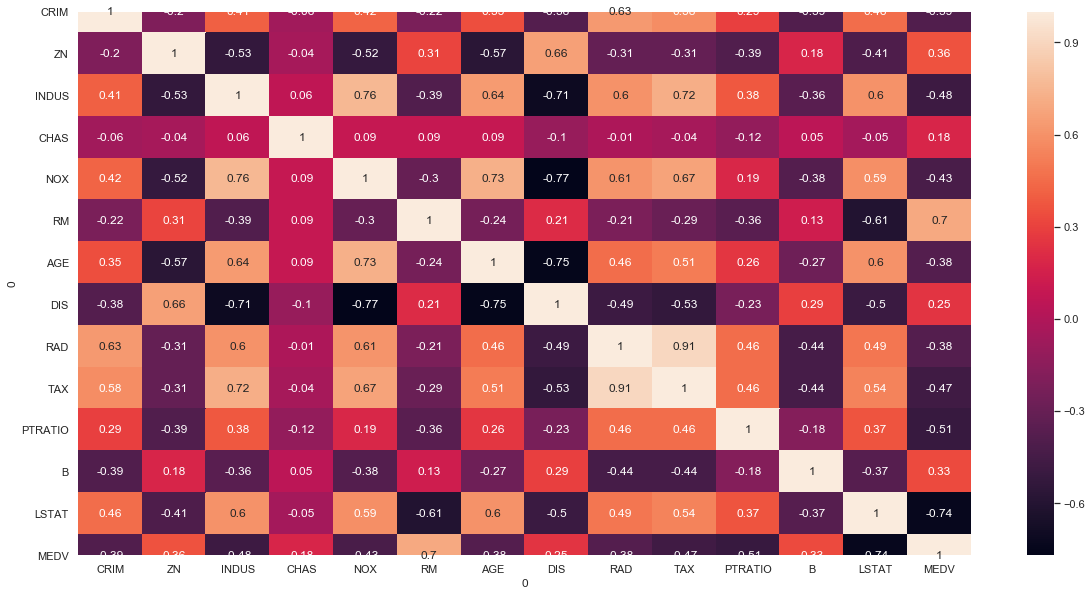

In [222]:
#plt.figure(figsize=(18,8))
correlation_matrix = df.corr().round(2) # Source: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

#"The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there 
# is a strong positive correlation between the two variables. When it is close to -1, the variables 
# have a strong negative correlation." i.e. very dark and very light areas are of most interest.

As per the above quote, very dark (close to -1) show a strong negative correlation or very light areas (close to 1) a strong positive correlation.  For example, the strongest positive correlation between RAD and TAX is seen with a score of 0.91. This means the houses with the most accessibility to radial highways are more likely to pay the full-value property-tax rate per $10,000.

In the case of CHAS and MEDV, a score of 0.18 is assigned indicating that there is no significant correlation between the 2 characteristics. Keeping in mind that only 35 houses of 506 are by the Charles River, I feel this test was worth running if even just to discount that thereis no obvious correlation we are overlooking. It could be noted that CHAS does not have any very strong correlations with the other characteristics and MEDV is in fact the strongest.

This heatmap shows us other connections however which will be more relevant later. 

"RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74)."

As a principle, we shouldnt pick both of these features for machine learning, just one, same with AGE and DIS

‘RM’, ‘LSTAT’(OUT), ‘PTRATIO’ and ‘MEDV’. are the most relevant 

RM                - average number of rooms per dwelling
PTRATIO      - pupil-teacher ratio by town
LSTAT          - % lower status of the population
MEDV          - Median value of owner-occupied homes in $1000's

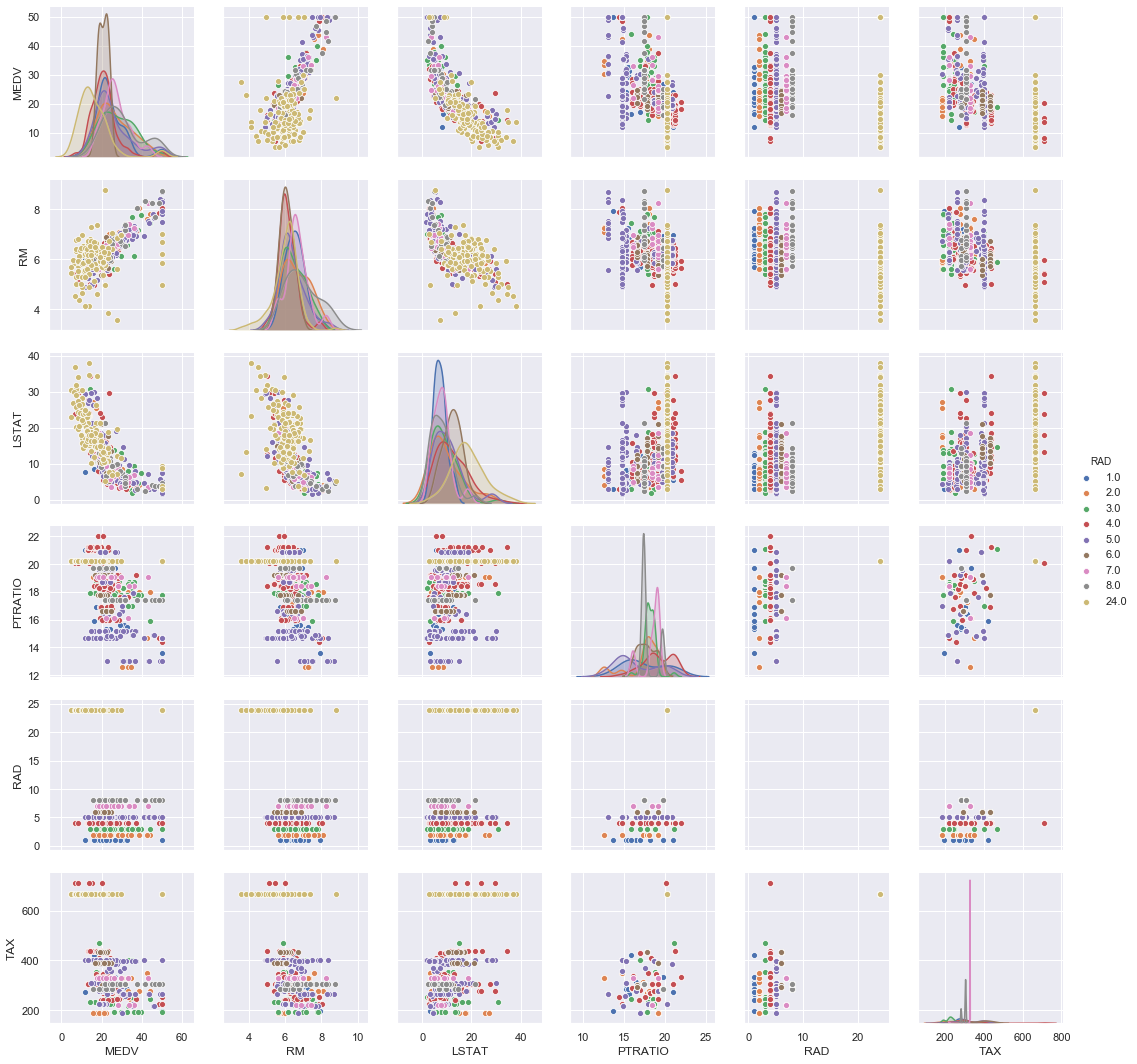

In [223]:
sns.pairplot(df[['MEDV', 'RM','LSTAT', 'PTRATIO', 'RAD', 'TAX']], hue='RAD') #create grid of plots where each variable is compared and colours determine the property type 

#Source:https://seaborn.pydata.org/generated/seaborn.pairplot.html

---------

# Keras


In [39]:
from tensorflow.python import keras
#print(keras.__version__)

In [40]:
import keras as kr

-----------------------

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 5us/step


In [3]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [17]:
#feature normalization . Feature normalizaion is when you subtract the mean of the feature from each feature and divide each result by the standard deviation.
#https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
from keras import models
from keras import layers
import numpy as np

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model


In [9]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [10]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [2.1586945056915283, 2.754331350326538, 2.7122654914855957, 2.508091926574707]
mean all scores : 2.5333458185195923


In [11]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 667us/step


In [12]:
test_mae_score

2.6999707221984863

=============================

=============

In [231]:
inputs = preprocessing.scale(df[['LSTAT']]).ravel() #se np.ravel (for a 1D view), https://stackoverflow.com/questions/13730468/from-nd-to-1d-arrays
output = preprocessing.scale(df['MEDV'])

In [236]:
### Create a new neural network.
n = kr.models.Sequential()

# Add neurons
n.add(kr.layers.Dense(65, input_dim=1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
n.add(kr.layers.Dense(10, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
n.add(kr.layers.Dense(1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close

# Compile the model.
n.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
n.fit(inputs, output, epochs=25,batch_size=10)

# Run each x value through the neural network.
p_2 = n.predict(inputs)

Epoch 1/25
506/506 [==============================] - 0s 725us/step - loss: 0.5258
Epoch 2/25
506/506 [==============================] - 0s 121us/step - loss: 0.3927
Epoch 3/25
506/506 [==============================] - 0s 121us/step - loss: 0.3753
Epoch 4/25
506/506 [==============================] - 0s 117us/step - loss: 0.3661
Epoch 5/25
506/506 [==============================] - 0s 115us/step - loss: 0.3670
Epoch 6/25
506/506 [==============================] - 0s 121us/step - loss: 0.3545
Epoch 7/25
506/506 [==============================] - 0s 121us/step - loss: 0.3620
Epoch 8/25
506/506 [==============================] - 0s 121us/step - loss: 0.3520
Epoch 9/25
506/506 [==============================] - ETA: 0s - loss: 0.328 - 0s 121us/step - loss: 0.3487
Epoch 10/25
506/506 [==============================] - 0s 126us/step - loss: 0.3521
Epoch 11/25
506/506 [==============================] - 0s 113us/step - loss: 0.3464
Epoch 12/25
506/506 [==============================] - 0s 128

In [237]:
#p_2.T #estimated MEDV values using model
#output.as_matrix() #actual MEDV values

#calculate mean squared error
#np.sqrt(np.sum((p_2.T - output.as_matrix())**2)) 

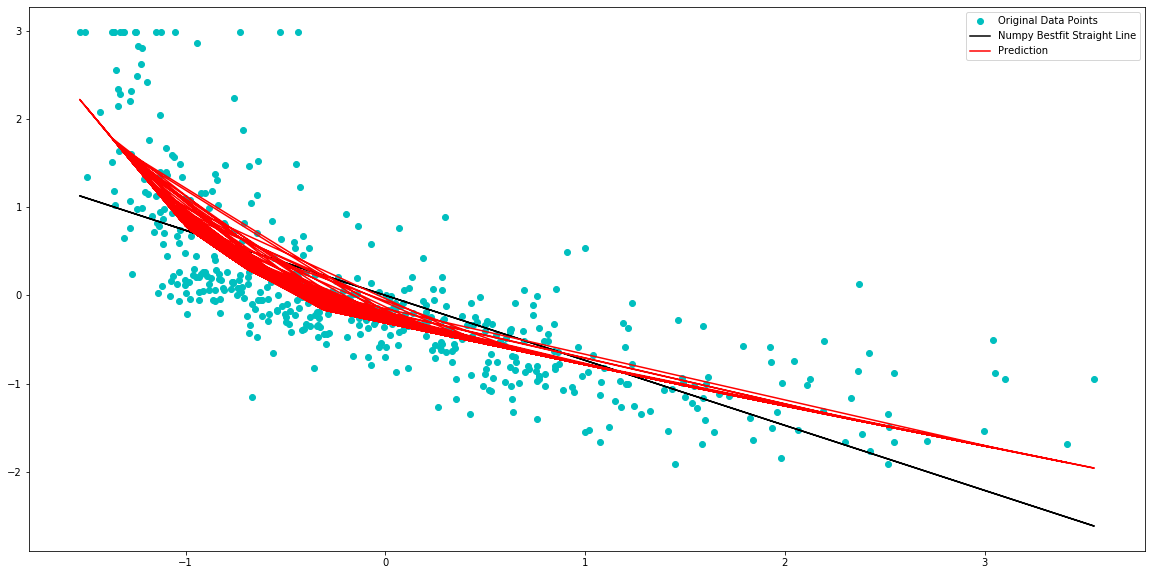

In [238]:
# Plot the values. #AdaDelta
plt.plot(inputs, output, 'co', label='Original Data Points')
#x_curve = np.linspace(4,9,100)
#y_curve = x_curve**2 + 9.10210898*r13 -34.67062078
#plt.plot(r13,t13, 'b-', label='Regression on Original Data Points')

fit = np.poly1d(np.polyfit(inputs, output, 1))
plt.plot(inputs, fit(inputs),'k-', label='Numpy Bestfit Straight Line')

plt.plot(inputs, p_2, 'r-', label='Prediction')
plt.legend()

In [122]:
#Predict:

input_test = [-3]
q_5 = pd.DataFrame(input_test).T
q_5

q_5 = n.predict(q_5)
q_5

array([[4.1758733]], dtype=float32)

========================

In [284]:
fit = np.poly1d(np.polyfit(xdata, ydata, 5))
plt.plot(xdata, fit(xdata),'k-', label='Numpy Bestfit LSTAT')
z_df= np.polyfit(inputs2, output2, 1)
p3 = np.poly1d(z_df) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
plt.plot(inputs2,p3(inputs2),"g--", label='Numpy Bestfit PTRATIO') #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 

plt.show()
plt.legend()

NameError: name 'xdata' is not defined

In [36]:
df_copy3 = df[['MEDV', 'PTRATIO', 'LSTAT']].copy().sort_values(by=['PTRATIO'])


In [37]:
from sklearn import preprocessing 
inputs2 = preprocessing.scale(df_copy3['PTRATIO'])
output2 = preprocessing.scale(df_copy3['MEDV'])

In [228]:
# Create a new neural network.
o = kr.models.Sequential()

# Add neurons
o.add(kr.layers.Dense(50, input_dim=1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
o.add(kr.layers.Dense(220, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
o.add(kr.layers.Dense(1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close


# Compile the model.
o.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
o.fit(inputs2, output2, epochs=20,batch_size=10)

# Run each x value through the neural network.
p_3 = o.predict(inputs2)

Epoch 1/20
506/506 [==============================] - 0s 905us/step - loss: 0.8138
Epoch 2/20
506/506 [==============================] - ETA: 0s - loss: 0.667 - ETA: 0s - loss: 0.869 - ETA: 0s - loss: 0.798 - 0s 340us/step - loss: 0.7761
Epoch 3/20
506/506 [==============================] - ETA: 0s - loss: 0.785 - 0s 350us/step - loss: 0.7656
Epoch 4/20
506/506 [==============================] - 1s 1ms/step - loss: 0.7608
Epoch 5/20
506/506 [==============================] - 0s 310us/step - loss: 0.7526
Epoch 6/20
506/506 [==============================] - 0s 336us/step - loss: 0.7717
Epoch 7/20
506/506 [==============================] - ETA: 0s - loss: 0.730 - 0s 356us/step - loss: 0.7633
Epoch 8/20
506/506 [==============================] - ETA: 0s - loss: 0.8777- ETA: 0s - loss: 0.94 - ETA: 0s - loss: 0.756 - 0s 366us/step - loss: 0.7502
Epoch 9/20
506/506 [==============================] - 0s 348us/step - loss: 0.7649 0s - loss: 0.778
Epoch 10/20
506/506 [==========================

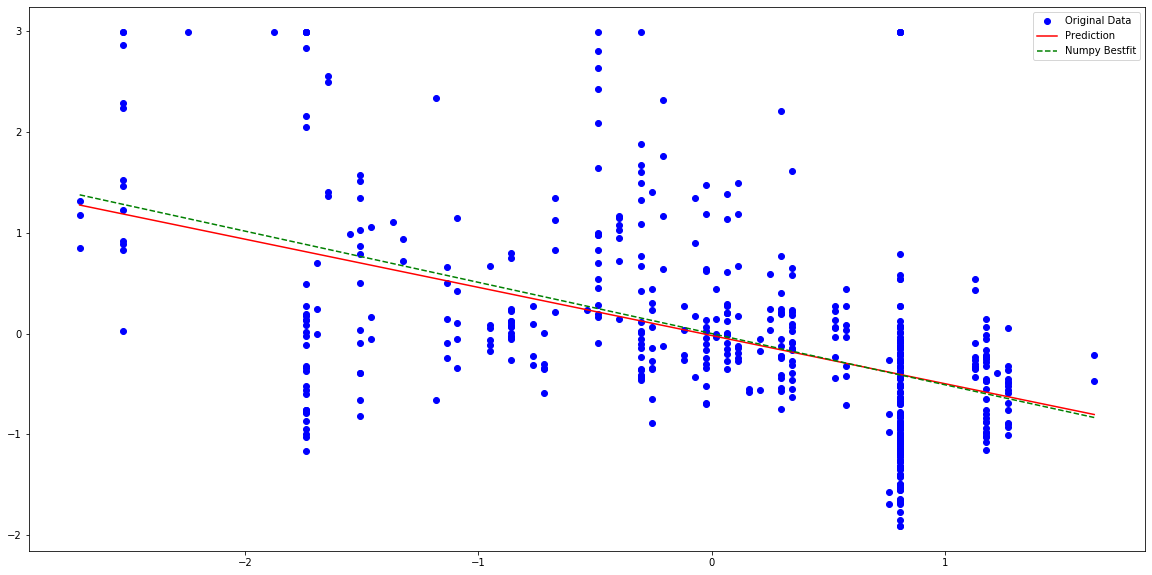

poly1d([-5.07786686e-01, -1.69659303e-17])

In [229]:
# Plot the values. #AdaDelta
#plt.plot(inputs, output, 'co', label='Original Data Points')
plt.plot(inputs2,output2, 'bo', label='Original Data')
plt.plot(inputs2, p_3, 'r-', label='Prediction')

z_df2= np.polyfit(inputs2, output2, 1)
p3 = np.poly1d(z_df2) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
plt.plot(inputs2,p3(inputs2),"g--", label='Numpy Bestfit') #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
plt.legend()
plt.show()

#where the resuting m and c are values in the equation of a straight line (y=mx+c)
p3  # Y = -2.1571753 x + 62.34462747

In [230]:
from sklearn.metrics import r2_score

#function to calculate the performance score between true and predicted values based on the metric chosen. Source: https://www.ritchieng.com/machine-learning-project-boston-home-prices/
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

#Calculate the performance of this model  
score = performance_metric(output2, p3(inputs2))
print ("Line (green) has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

Line (green) has a coefficient of determination, R^2, of 0.258. or 25.78 % accuracy


In [245]:
from sklearn import preprocessing
train_data1 = preprocessing.scale(df_copy3[['PTRATIO', 'LSTAT']])
test_data1 = preprocessing.scale(df_copy3[['MEDV']])

In [283]:
inputs3 = train_data1
output3 = test_data1 

### Create a new neural network.
q = kr.models.Sequential()

# Add neurons
q.add(kr.layers.Dense(20, input_dim=2, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(45, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(20, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close

# Compile the model.
q.compile(loss="mean_squared_error", optimizer="Nadam") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
q.fit(inputs3, output3, epochs=25,batch_size=10)

# Run each x value through the neural network.
q_3 = q.predict(inputs3)

Epoch 1/25
506/506 [==============================] - 1s 1ms/step - loss: 0.4651
Epoch 2/25
506/506 [==============================] - 0s 128us/step - loss: 0.3443
Epoch 3/25
506/506 [==============================] - 0s 134us/step - loss: 0.3239
Epoch 4/25
506/506 [==============================] - 0s 144us/step - loss: 0.3108
Epoch 5/25
506/506 [==============================] - 0s 138us/step - loss: 0.3103
Epoch 6/25
506/506 [==============================] - 0s 136us/step - loss: 0.3131
Epoch 7/25
506/506 [==============================] - 0s 134us/step - loss: 0.2998
Epoch 8/25
506/506 [==============================] - 0s 142us/step - loss: 0.2905
Epoch 9/25
506/506 [==============================] - 0s 134us/step - loss: 0.2947
Epoch 10/25
506/506 [==============================] - 0s 136us/step - loss: 0.2970
Epoch 11/25
506/506 [==============================] - 0s 134us/step - loss: 0.2878
Epoch 12/25
506/506 [==============================] - 0s 144us/step - loss: 0.2870
Epo

In [279]:
#Calculate the performance of this model but only if viewing it as a linear model 
score = performance_metric(output3, q_3)
print ("Line (green) has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

Line (green) has a coefficient of determination, R^2, of 0.716. or 71.56 % accuracy


In [280]:
input_test = [2,15]
q_4a = pd.DataFrame(input_test)
q_4 = n.predict(q_4a)
q_4

array([[-1.2543447],
       [-7.1927423]], dtype=float32)

# need to convert this back to prepfrocessed stage

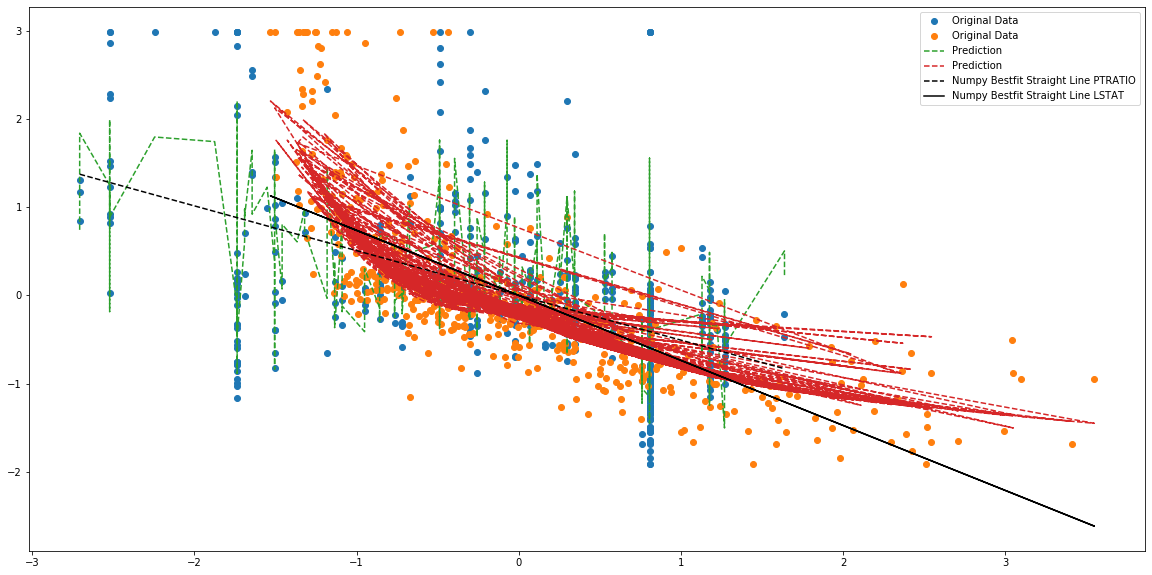

In [281]:

plt.plot(inputs3,output3, 'o', label='Original Data')

plt.plot(inputs3, q_3, '--', label='Prediction')

z_df3= np.polyfit(inputs2, output2, 1)
p4 = np.poly1d(z_df3) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
plt.plot(inputs2,p4(inputs2),"k--", label='Numpy Bestfit Straight Line PTRATIO') #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 

z_df4= np.polyfit(inputs, output, 1)
p5 = np.poly1d(z_df4) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
plt.plot(inputs,p5(inputs),"k-", label='Numpy Bestfit Straight Line LSTAT') #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 

plt.legend()
plt.show()


# Extra investigation into RAD and TAX relationship

-----------------------------

Firstly I built a function to split out data and allow me to review for trends before deciding which characteristics to choose for predictions.

The function is based on the below principles:

That the unique groupigns can be identified easily using .unique(),
`df1.RAD.unique()` 


and each group then separated for further analysis.
`df_rad1 = ((df1[df1['RAD'] == "4"]))`

The first review was for RAD vs TAX based on the correlation we could see in the heat map above. 

--------

### What if the size of the property is a factor to consider?
MEDV is a curious feature as it appears to be a total value for the property not taking into account for the size of it. After location, the size or quality of the building are surely the biggest factors influencing price. 

As we do have a column that is an inidicator of size, the average number of rooms per dwelling (RM), I will divide the total price by the average number of rooms to get an indicative square metre price. 

In [224]:
df_sm = df.filter(items=['CHAS', 'RM','MEDV'])
df_sm2 =  df_sm.MEDV / df_sm.RM 
df_sm3 = pd.concat([df_sm, df_sm2], axis=1, sort=False).drop(['RM', 'MEDV'], axis=1)
df_sm3.columns = ('CHAS', 'SME') #SME for Square Metre estimate
#df_sm3

sme_t = (df_sm3[df_sm3['CHAS'] == 0].drop(['CHAS'], axis=1))
sme_f = (df_sm3[df_sm3['CHAS'] == 1].drop(['CHAS'], axis=1))


In [225]:
ss.ttest_ind(sme_t, sme_f)

Ttest_indResult(statistic=array([-4.03428532]), pvalue=array([6.32638216e-05]))

P value is still not close enough 

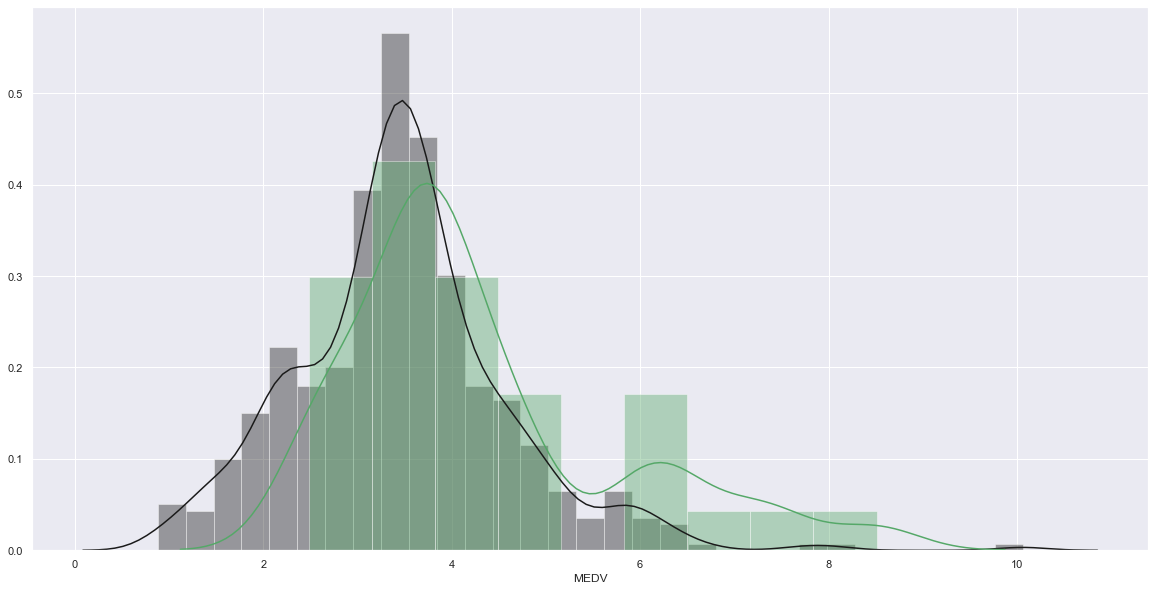

In [226]:
sns.distplot(sme_t, color='k', axlabel='MEDV') # house MEDV prices close to the river are in b;ack
sns.distplot(sme_f, color='g') # house MEDV prices farther from the river are in green

====

In [349]:
def impact(rating, column_name_string1, column_name_string2, column_name_string_return):
        df_rad1 = ((df1[df1[column_name_string1] == str(rating)]))
        df_rad11 = pd.concat([df[column_name_string2], df_rad1], axis=1, sort=False)
        rad_1y = ((df_rad11[df_rad11[column_name_string1] == True]).drop([column_name_string1], axis=1))
        rad_1y1 = rad_1y.values
        #len_1x = len(rad_1y)
        rad_1x = []
        i = 0
        while i<len(rad_1y):
            i=i+1
            rad_1x.append(rating)
        return df_rad1[column_name_string_return]
    
#####################################

run1 = impact(1, 'RAD', 'TAX', 'TAX')
run2 = impact(2, 'RAD', 'TAX', 'TAX')
run3 = impact(3, 'RAD', 'TAX', 'TAX')
run4 = impact(4, 'RAD', 'TAX', 'TAX')
run5 = impact(5, 'RAD', 'TAX', 'TAX')
run6 = impact(6, 'RAD', 'TAX', 'TAX')
run7 = impact(7, 'RAD', 'TAX', 'TAX')
run8 = impact(8, 'RAD', 'TAX', 'TAX')
run9 = impact(24, 'RAD', 'TAX', 'TAX')

#Check point:
#print(len(rad_impact(24))+len(rad_impact(1))+ len(rad_impact(2))+ len(rad_impact(3))+ len(rad_impact(4))+ len(rad_impact(5))+ len(rad_impact(6))+ len(rad_impact(7))+ len(rad_impact(8)))

radx = pd.concat([run1, run2, run3, run4, run5, run6, run7, run8, run9], axis=1)
radx.columns=("1", "2","3" ,"4" ,"5" ,"6" ,"7" ,"8", "24")

run10 = impact(1, 'RAD', 'TAX', 'MEDV')
run11 = impact(2, 'RAD', 'TAX', 'MEDV')
run12 = impact(3, 'RAD', 'TAX', 'MEDV')
run13 = impact(4, 'RAD', 'TAX', 'MEDV')
run14 = impact(5, 'RAD', 'TAX', 'MEDV')
run15 = impact(6, 'RAD', 'TAX', 'MEDV')
run16 = impact(7, 'RAD', 'TAX', 'MEDV')
run17 = impact(8, 'RAD', 'TAX', 'MEDV')
run18 = impact(24, 'RAD', 'TAX', 'MEDV')

#Check point:
#print(len(rad_impact(24))+len(rad_impact(1))+ len(rad_impact(2))+ len(rad_impact(3))+ len(rad_impact(4))+ len(rad_impact(5))+ len(rad_impact(6))+ len(rad_impact(7))+ len(rad_impact(8)))

radx_2 = pd.concat([run10, run11, run12, run13, run14, run15, run16, run17, run18], axis=1)
radx_2.columns=("1", "2","3" ,"4" ,"5" ,"6" ,"7" ,"8", "24")

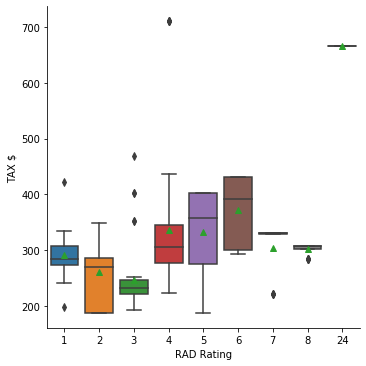

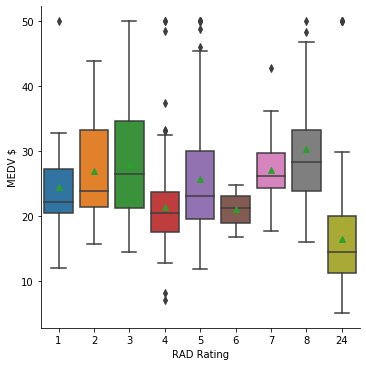

In [350]:
ax = sns.catplot(kind="box",data=radx, showmeans=True)
ax.set(xlabel='RAD Rating', ylabel='TAX $')

ay = sns.catplot(kind="box",data=radx_2, showmeans=True)
ay.set(xlabel='RAD Rating', ylabel='MEDV $')


In [351]:
radx1 = radx.astype(float)
radx2 = radx1.mean(axis=0, skipna=True)
rad_mean = pd.DataFrame(radx2).T
rad_mean.columns=("1 (mean)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)")
rx1 = ["1 (mean TAX)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)"]
ry1 = rad_mean.iloc[0,:]
round(rad_mean, 3)

,1 (mean),2 (mean),3 (mean),4 (mean),5 (mean),6 (mean),7 (mean),8 (mean),24 (mean)
0,291.45,260.667,246.079,335.982,331.843,372.885,304.412,301.25,666.0


In [352]:
radx1 = radx_2.astype(float)
radx2 = radx1.mean(axis=0, skipna=True)
rad_mean = pd.DataFrame(radx2).T
rad_mean.columns=("1 (mean)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)")
rx2 = ["1 (mean MEDV)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)"]
ry2 = rad_mean.iloc[0,:]
round(rad_mean, 3)

,1 (mean),2 (mean),3 (mean),4 (mean),5 (mean),6 (mean),7 (mean),8 (mean),24 (mean)
0,24.365,26.833,27.929,21.387,25.707,20.977,27.106,30.358,16.404


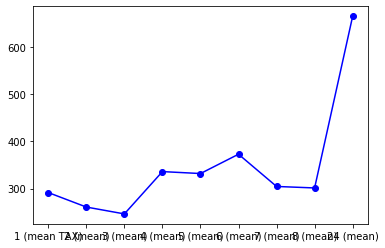

In [353]:
plt.plot(rx1, ry1, '-bo')

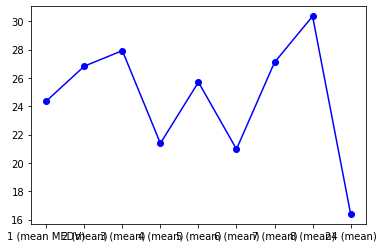

In [355]:
plt.plot(rx2, ry2, '-bo')

## End

--------------------------------

# Back up

# Deciding if LSTATS or RM should be used - but not both!

Test the most obvious correlation - rooms (indication of size) vs price 

In [6]:
df_copy1 = df[['MEDV', 'RM']].copy()
df_copy2 = df_copy1.sort_values(by=['RM'])

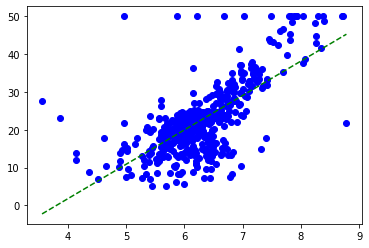

poly1d([  9.10210898, -34.67062078])

In [196]:
x_df = df_copy2['RM']
y_df = df_copy2['MEDV']
plt.plot(x_df,y_df, 'bo')
z_df= np.polyfit(x_df, y_df, 1)
p = np.poly1d(z_df) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial

plt.plot(x_df,p(x_df),"g--") #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
plt.show()
#where the resuting m and c are values in the equation of a straight line (y=mx+c)
p  # Y = 9.10210898 x + (-34.67062078)

In [331]:
from sklearn.metrics import r2_score

#function to calculate the performance score between true and predicted values based on the metric chosen. Source: https://www.ritchieng.com/machine-learning-project-boston-home-prices/
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

#Calculate the performance of this model  
score = performance_metric(y_df, p2(x_df))
print ("Line (green) has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

Line (green) has a coefficient of determination, R^2, of -0.540. or -53.98 % accuracy


==========Modeling RM=========

In [304]:
#x = np.linspace(-10.0, 10.0, 506)
x = df_copy2 ['RM']
y = df_copy2 ['MEDV']


# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(40, input_dim=1, activation="tanh")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
m.add(kr.layers.Dense(60, activation="tanh"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta
# got to 42,x during testing with 60epochs, no change to neuron numbers. 

# Train the model.
m.fit(x, y, epochs=60,batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

Epoch 1/60
 80/506 [===>..........................] - ETA: 18s - loss: 505.3743

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (506,) and (2,)

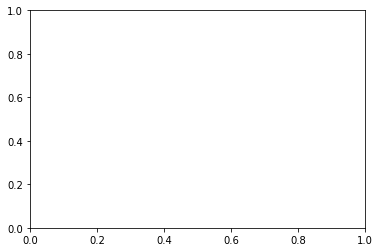

In [321]:
# Plot the values. #AdaDelta
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'ko', label='Original Data Points')
r13 = np.linspace(4,9,100)
t13 = 9.10210898*r13 -34.67062078
plt.plot(r13,t13, 'b-', label='Regression on Original Data Points')
plt.legend()

## Trialing LSTAT Curves for BestFit 

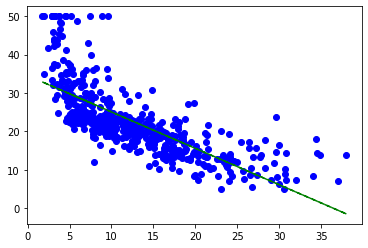

poly1d([-0.95004935, 34.55384088])

In [324]:
x_df2 = df['LSTAT']
y_df2 = df['MEDV']
plt.plot(x_df2,y_df2, 'bo')   #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
z_df2= np.polyfit(x_df2, y_df2, 1)
p2 = np.poly1d(z_df2) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial

plt.plot(x_df2,p2(x_df2),"g--") #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
plt.show()
#where the resuting m and c are values in the equation of a straight line (y=mx+c)
p2  # Y = 9.10210898 x + (-34.67062078)

In [329]:
from sklearn.metrics import r2_score

#function to calculate the performance score between true and predicted values based on the metric chosen. Source: https://www.ritchieng.com/machine-learning-project-boston-home-prices/
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

#Calculate the performance of this model  
score = performance_metric(y_df2, p2(x_df2))
print ("Curve 2 (green) has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

Curve 2 (green) has a coefficient of determination, R^2, of 0.544. or 54.41 % accuracy


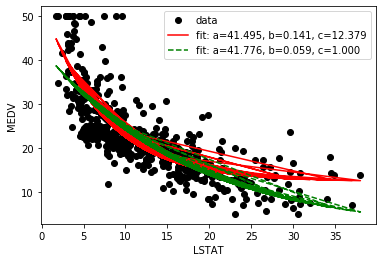

In [300]:
from scipy.optimize import curve_fit

def func(x, a, b, c):    #Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    return a * np.exp(-b * x) + c

xdata = df['LSTAT']
ydata = df['MEDV']
plt.plot(xdata, ydata, 'ko', label='data')

#Fit for the parameters a, b, c of the function func:

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

curve_1_y_data = func(xdata, *popt)

#Constrain the optimization to the region of 0 <= a <= 50, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [55., 1., 1.0]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
curve_2_y_data = func(xdata, *popt)

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()